### Import Anatomist (must be in a BrainVisa environment)

In [1]:
"""import anatomist.api as ana
from soma.qt_gui.qtThread import QtThreadCall
from soma.qt_gui.qt_backend import Qt

a = ana.Anatomist()

from soma import aims"""

'import anatomist.api as ana\nfrom soma.qt_gui.qtThread import QtThreadCall\nfrom soma.qt_gui.qt_backend import Qt\n\na = ana.Anatomist()\n\nfrom soma import aims'

In [54]:
import numpy as np
import pandas as pd
import os
import glob

In [55]:
base_path = "/volatile/ad279118/Irene/MOSTEST/Results/ChampollionV0"
region_model = "SFint-FCMant_right/trained_on_UKB40/16-55-54_1"

From the variable base_path, the files must then be ordered as:

```
SFint-FCMant_left
└── trained_on_UKB40
    └── 16-55-54_0
        ├── Correlation_Matrix_SNPs_MOSTest.eps
        ├── extracted_genotypes.raw
        ├── mostest_imputed_autosomes_decim_maf-0.05.most_orig.sumstats
        ├── mostest_imputed_autosomes_decim_maf-0.05_most_orig.zmat.tsv
        └── pheno_pre_residualized.txt
```

In [56]:
pre_residualized_bdd = pd.read_csv(f'{base_path}/{region_model}/pheno_pre_residualized.txt', sep='\t')
z_score = pd.read_csv(f'{base_path}/{region_model}/mostest_imputed_autosomes_decim_maf-0.05_most_orig.zmat.tsv', sep='\t')

pre_residualized_bdd = pre_residualized_bdd.drop('#FID', axis=1)
pre_residualized_bdd = pre_residualized_bdd.set_index('IID')

In [57]:
path_to_lead_SNPs = glob.glob(f'{base_path}/{region_model}/FUMA_job*/leadSNPs.txt')[0]
FUMA_lead_SNP = pd.read_csv(path_to_lead_SNPs, sep='\t', index_col=0)
FUMA_lead_SNP

,GenomicLocus,uniqID,rsID,chr,pos,p,nIndSigSNPs,IndSigSNPs
No,,,,,,,,
1,1,1:19968058:C:T,rs12408663,1,19968058,1.814041e-13,1,rs12408663
2,2,2:37079583:C:T,rs62132522,2,37079583,4.887138e-11,1,rs62132522
3,3,2:65974233:C:G,rs6743531,2,65974233,1.575411e-10,1,rs6743531
4,4,2:109955290:C:T,rs7421851,2,109955290,2.351573e-09,1,rs7421851
5,5,2:188353663:G:T,rs8176501,2,188353663,3.247725e-09,1,rs8176501
6,6,3:52568805:G:T,rs7639267,3,52568805,8.628843e-11,1,rs7639267
7,7,3:147106319:C:T,rs2279829,3,147106319,1.225684e-08,1,rs2279829
8,8,3:177316085:A:C,rs4241484,3,177316085,1.680526e-13,2,rs4241484;rs552757
9,9,5:92187932:C:T,rs17669337,5,92187932,2.250618e-09,1,rs17669337


In [58]:
print(pre_residualized_bdd.shape)
pre_residualized_bdd = pre_residualized_bdd[[f'dim{i}' for i in range(1,pre_residualized_bdd.shape[1]+1)]]
pre_residualized_bdd.iloc[:,:5].head()

(36000, 41)


,dim1,dim2,dim3,dim4,dim5
IID,,,,,
1000021,0.628218,-1.708885,-1.428725,-0.590243,-0.031094
1000325,-0.350118,0.798591,0.807820,0.852636,-0.134123
1000458,1.035778,0.371073,0.003934,-0.058765,-1.440219
1000575,-0.064695,1.445741,-0.724786,-0.741915,-0.486698
1000606,-0.957629,-1.551401,-1.192737,-0.407881,2.167530


### First approach using the Z-scores to find a direction in the latent space

In [59]:
print(z_score.shape)
z_score = z_score[['CHR','SNP','PVAL', 'N', 'FREQ']+[f'dim{i}' for i in range(1,pre_residualized_bdd.shape[1]+1)]]
z_score.iloc[:,:8].head()

(1296, 46)


,CHR,SNP,PVAL,N,FREQ,dim1,dim2,dim3
0,1,rs1995312,1.659226e-08,41313.0,0.251652,3.510661,-0.447292,4.083768
1,1,rs16822413,1.954248e-08,41327.0,0.251700,3.529509,-0.410000,4.130117
2,1,rs10429880,8.377749e-10,41092.0,0.240473,3.613584,0.125791,4.189022
3,1,rs10917498,6.527683e-11,41182.0,0.239595,3.762749,0.035373,4.231443
4,1,rs7517255,6.527683e-11,41185.0,0.239456,3.762749,0.035373,4.231443


In [60]:
def project(direction, latent=pre_residualized_bdd):
    # Compute the dot product of each row in pre_residualized_bdd with the direction
    dot_products = latent.apply(lambda row: np.dot(row, direction), axis=1)


    direction = np.dot(direction, direction)
    projections = dot_products / direction

    # Sort the series by the projection values
    sorted_projections = projections.sort_values(ascending=False)

    return sorted_projections

In [61]:
genotype = pd.read_csv(f'{base_path}/{region_model}/extracted_genotypes.raw', sep='\t')
genotype.head()

,FID,IID,PAT,MAT,SEX,PHENOTYPE,rs12408663_C,rs62132522_C,rs6743531_C,rs7421851_C,...,rs2214230_T,rs4556147_T,rs6478240_G,rs9695700_A,rs11049390_A,rs79487293_T,rs12146713_C,rs4924346_A,rs4843552_A,rs3874943_G
0,1000021,1000021,0,0,1,-9,0.0,0.0,2.0,2.0,...,1.0,1.0,1.0,2.0,0.0,1,1,0.0,1.0,1.0
1,1000325,1000325,0,0,1,-9,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0,0,0.0,1.0,2.0
2,1000458,1000458,0,0,1,-9,0.0,1.0,0.0,2.0,...,1.0,0.0,1.0,2.0,1.0,1,1,1.0,2.0,1.0
3,1000575,1000575,0,0,1,-9,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1,1,0.0,2.0,2.0
4,1000606,1000606,0,0,2,-9,1.0,0.0,2.0,1.0,...,1.0,1.0,2.0,2.0,1.0,1,0,0.0,2.0,0.0


In [62]:
genotype[['IID','SEX','rs12408663_C']].head()

,IID,SEX,rs12408663_C
0,1000021,1,0.0
1,1000325,1,0.0
2,1000458,1,0.0
3,1000575,1,0.0
4,1000606,2,1.0


rs12408663 

Number of subject with 0 allele C: 20606
Number of subject with 1 allele C: 12505
Number of subject with 2 allele C: 1817


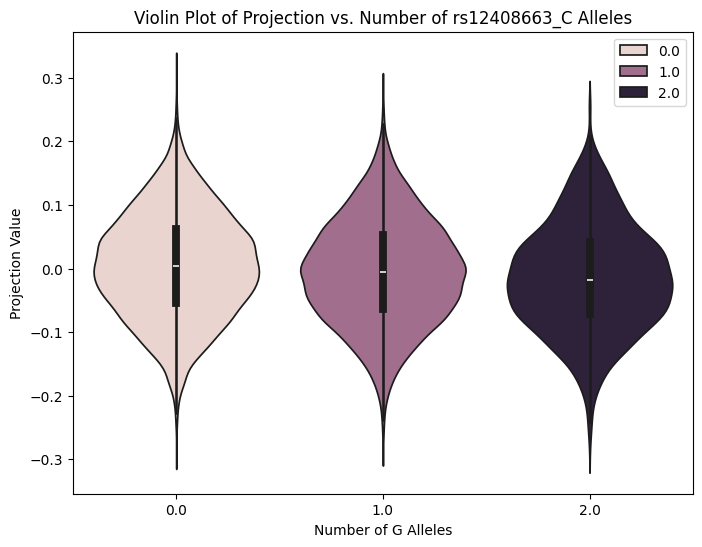

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import softmax

heuristic = "direction_Z_score" #"direction_square_Z_score" "direction_soft_max" "direction_Z_score"
depending_on_SEX = False

#SELECTED_SNP = "rs10917502"
for SELECTED_SNP in FUMA_lead_SNP.rsID:
    print(SELECTED_SNP, "\n")
    speci_Z = z_score[z_score.SNP==SELECTED_SNP][[f'dim{i}' for i in range(1,pre_residualized_bdd.shape[1]+1)]]

    
    if heuristic == "direction_square_Z_score":
        direction = np.sign(speci_Z)*speci_Z**2
    elif heuristic == "direction_soft_max":
        direction = np.sign(speci_Z)*softmax(speci_Z)
    elif direction == "regression_on_latent":
        
    else:
        direction = speci_Z

    direction = direction.to_numpy().flatten()

    sorted_projections = project(direction, pre_residualized_bdd)
    sorted_projections.name = 'projection'
    sorted_projections_df = sorted_projections.reset_index()
    sorted_projections_df.columns = ['IID', 'projection']

    selected_columns = genotype.loc[:, genotype.columns.str.startswith(SELECTED_SNP)]
    rsids = [rsid for rsid in selected_columns.columns]
    reduced_genotype = genotype[['IID', 'SEX']+rsids]

    merged = pd.merge(sorted_projections, reduced_genotype, on='IID', how='inner')
    merged = merged.dropna()

    folder_path = f'/volatile/ad279118/2024_adufournet_sulcus_genetics/contrastive/notebooks/antoine/MOStest/Sorted_projection/{region_model}/{heuristic}'
    # Ensure the folder exists
    os.makedirs(folder_path, exist_ok=True)

    # Define the full path to the CSV file
    csv_path = os.path.join(folder_path, f'{SELECTED_SNP}.csv')
    sorted_projections_df.set_index('IID', inplace=True)
    sorted_projections_df.to_csv(csv_path)

    #print("10 first extreme cases", "\n", merged.iloc[0:10], "\n")
    #print("10 last extreme cases", "\n",merged.iloc[-10:], "\n")
    print(f"Number of subject with 0 allele {rsids[0][-1]}:", len(merged[merged[rsids[0]]==0]))
    print(f"Number of subject with 1 allele {rsids[0][-1]}:", len(merged[merged[rsids[0]]==1]))
    print(f"Number of subject with 2 allele {rsids[0][-1]}:", len(merged[merged[rsids[0]]==2]))
    
    if depending_on_SEX:

        geno_pheno_male = merged[merged.SEX==1]
        geno_pheno_female = merged[merged.SEX==2]

        plt.figure(figsize=(8, 6))
        sns.violinplot(x=rsids[0], y='projection', data=geno_pheno_male, hue=rsids[0])

        plt.xlabel('Number of G Alleles')
        plt.ylabel('Projection Value')
        plt.title(f'Violin Plot of Projection vs. Number of {rsids[0]} Alleles for males')
        plt.legend(loc='upper right')
        plt.show()

        plt.figure(figsize=(8, 6))
        sns.violinplot(x=rsids[0], y='projection', data=geno_pheno_female, hue=rsids[0])

        plt.xlabel('Number of G Alleles')
        plt.ylabel('Projection Value')
        plt.title(f'Violin Plot of Projection vs. Number of {rsids[0]} Alleles for females')
        plt.legend(loc='upper right')
        plt.show()

    else:        
        
        plt.figure(figsize=(8, 6))
        sns.violinplot(x=rsids[0], y='projection', data=merged, hue=rsids[0])

        plt.xlabel('Number of G Alleles')
        plt.ylabel('Projection Value')
        plt.title(f'Violin Plot of Projection vs. Number of {rsids[0]} Alleles')
        plt.legend(loc='upper right')
        plt.show()
    break



 

### Second approach using a regression on the residualized phenotype based on the genotype

In [64]:
bdd_geno = pd.merge(pre_residualized_bdd, genotype, on='IID', how='inner')
bdd_geno = bdd_geno.dropna()
bdd_geno.head()

,IID,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,...,rs2214230_T,rs4556147_T,rs6478240_G,rs9695700_A,rs11049390_A,rs79487293_T,rs12146713_C,rs4924346_A,rs4843552_A,rs3874943_G
0,1000021,0.628218,-1.708885,-1.428725,-0.590243,-0.031094,-1.723767,-0.480281,0.337929,0.851535,...,1.0,1.0,1.0,2.0,0.0,1,1,0.0,1.0,1.0
1,1000325,-0.350118,0.798591,0.807820,0.852636,-0.134123,-0.552776,0.033463,1.491171,-0.658794,...,1.0,0.0,1.0,1.0,0.0,0,0,0.0,1.0,2.0
2,1000458,1.035778,0.371073,0.003934,-0.058765,-1.440219,-0.564333,2.937795,-0.803100,-0.423519,...,1.0,0.0,1.0,2.0,1.0,1,1,1.0,2.0,1.0
3,1000575,-0.064695,1.445741,-0.724786,-0.741915,-0.486698,2.706212,-1.966903,-0.117349,-0.498174,...,0.0,0.0,0.0,1.0,1.0,1,1,0.0,2.0,2.0
4,1000606,-0.957629,-1.551401,-1.192737,-0.407881,2.167530,0.508924,-0.902055,-0.018627,0.280297,...,1.0,1.0,2.0,2.0,1.0,1,0,0.0,2.0,0.0


In [72]:
import statsmodels.api as sm

# Features (latent dimensions) and target (genotype)
X = bdd_geno[[f'dim{i}' for i in range(1,pre_residualized_bdd.shape[1]+1)]]  # Select all latent dimensions



rs12408663_C
R-squared (uncentered): 0.0026390773258210265
Prob (F-statistic): 0.024449559238370236 



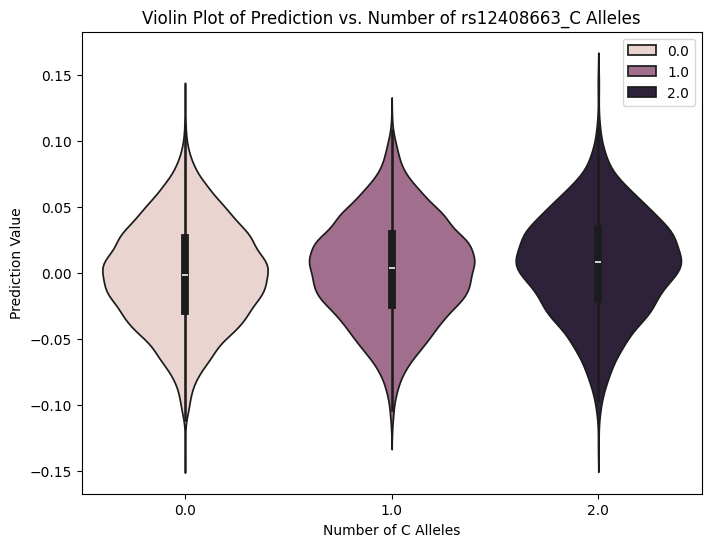

rs62132522_C
R-squared (uncentered): 0.0026990665394134306
Prob (F-statistic): 0.01847142692264687 



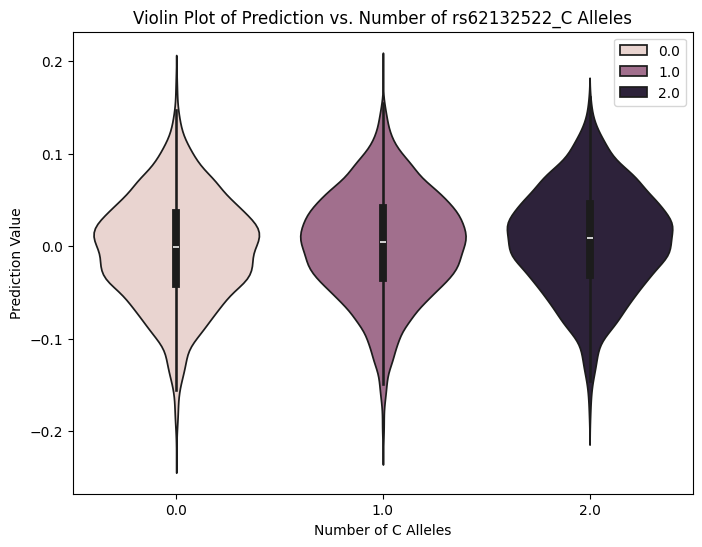

rs6743531_C
R-squared (uncentered): 0.0020473034564023607
Prob (F-statistic): 0.23854675191757055 



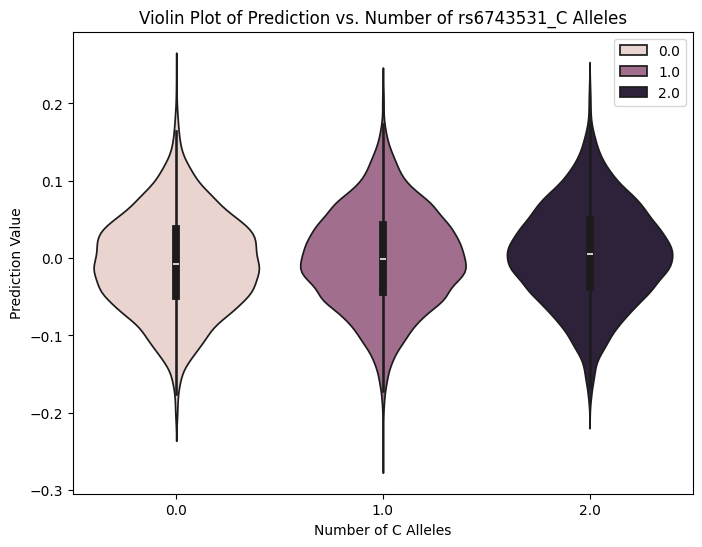

rs7421851_C
R-squared (uncentered): 0.0018543400865944637
Prob (F-statistic): 0.4015090167645859 



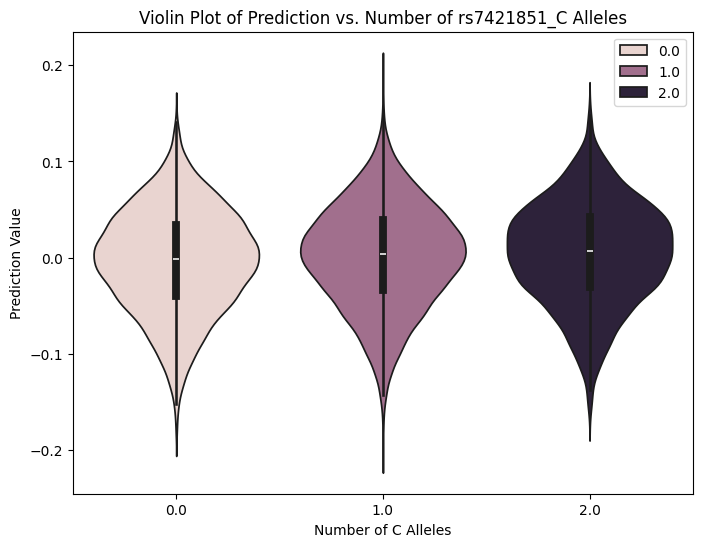

rs8176501_G
R-squared (uncentered): 0.0027984469335213813
Prob (F-statistic): 0.011408637838250154 



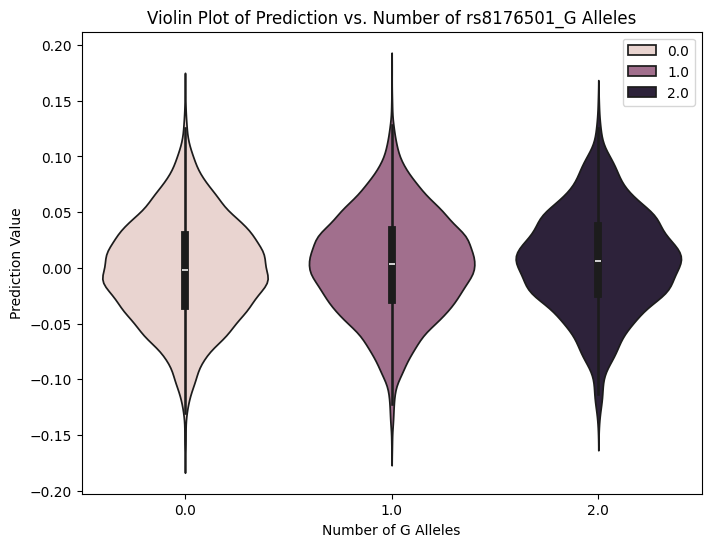

rs7639267_T
R-squared (uncentered): 0.001779844224320426
Prob (F-statistic): 0.4749831544535358 



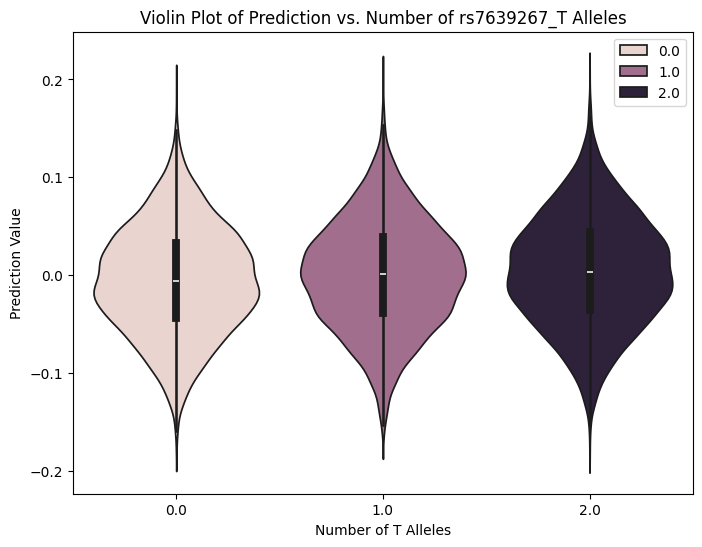

rs2279829_T
R-squared (uncentered): 0.002521487082520313
Prob (F-statistic): 0.04135163404513924 



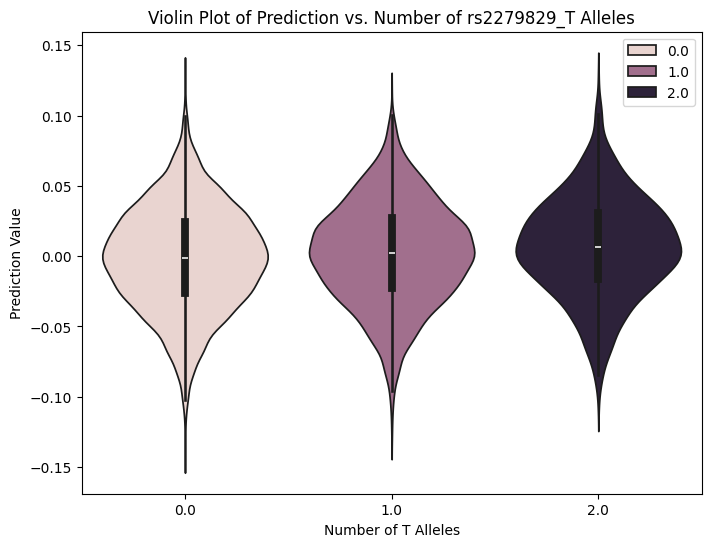

rs4241484_A
R-squared (uncentered): 0.001160175412257547
Prob (F-statistic): 0.9593708487526251 



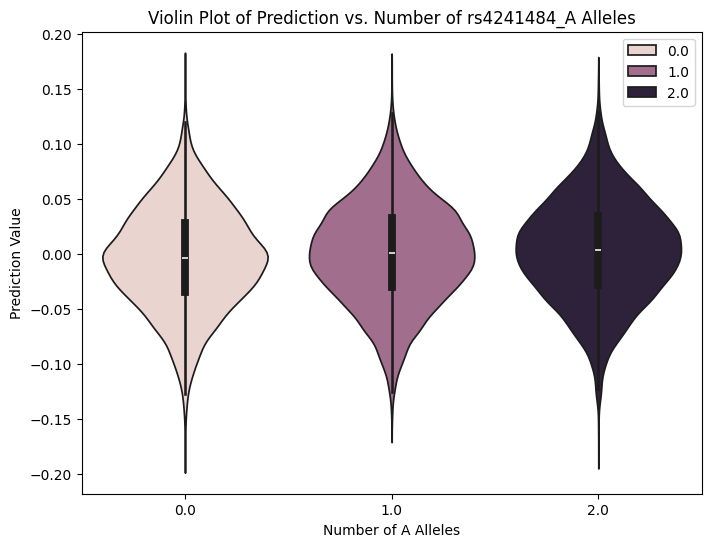

rs17669337_T
R-squared (uncentered): 0.0020834708061195917
Prob (F-statistic): 0.21352136316489687 



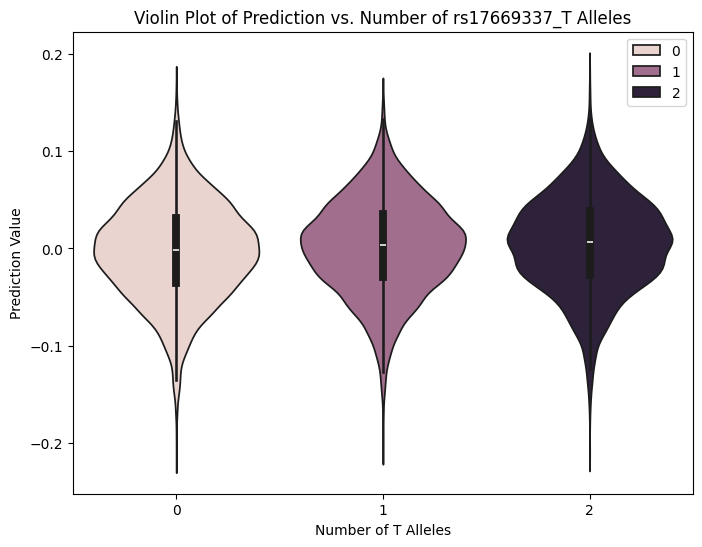

rs12187568_G
R-squared (uncentered): 0.0034491878958409217
Prob (F-statistic): 0.0003064025541721079 



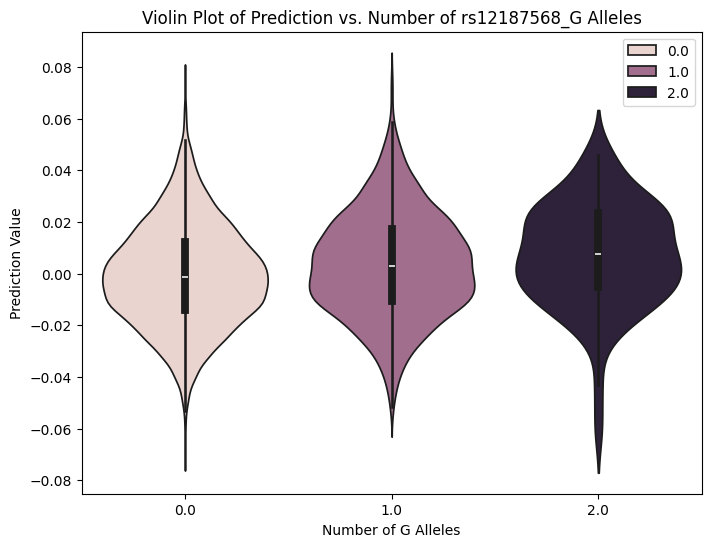

rs199205_C
R-squared (uncentered): 0.0015067268841413295
Prob (F-statistic): 0.7486178795406735 



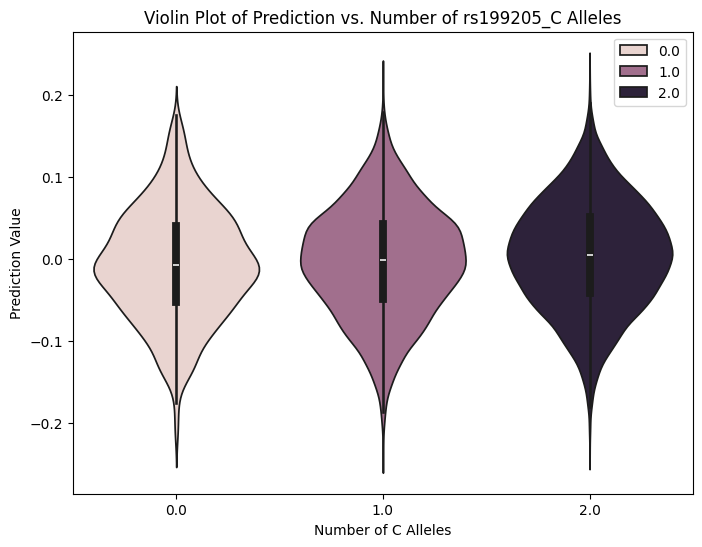

rs4714262_C
R-squared (uncentered): 0.002806365367128416
Prob (F-statistic): 0.010969027254729351 



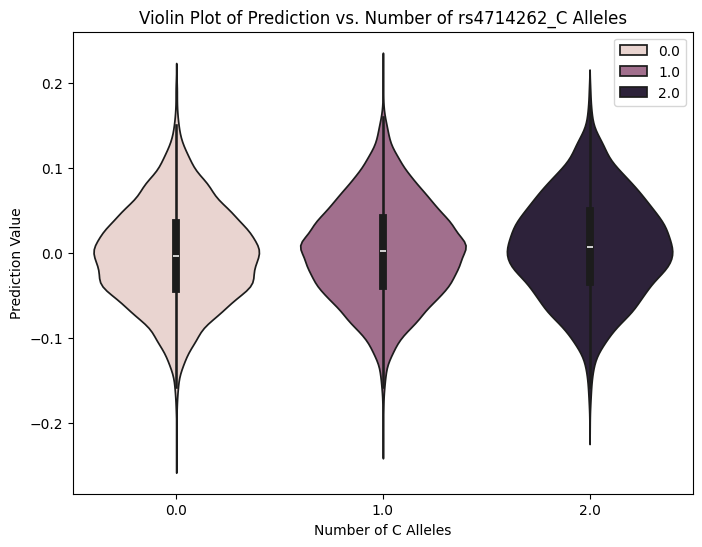

rs11963634_G
R-squared (uncentered): 0.002690698541657155
Prob (F-statistic): 0.019217469031158906 



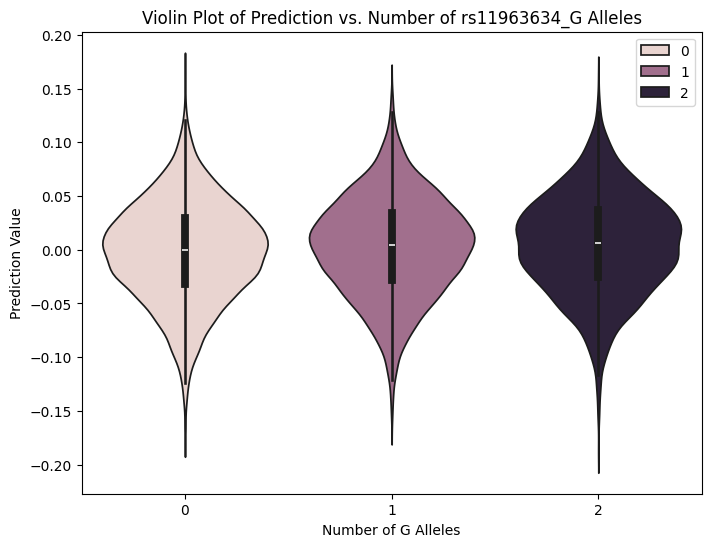

rs9388490_T
R-squared (uncentered): 0.0021333318241637533
Prob (F-statistic): 0.1820638235570894 



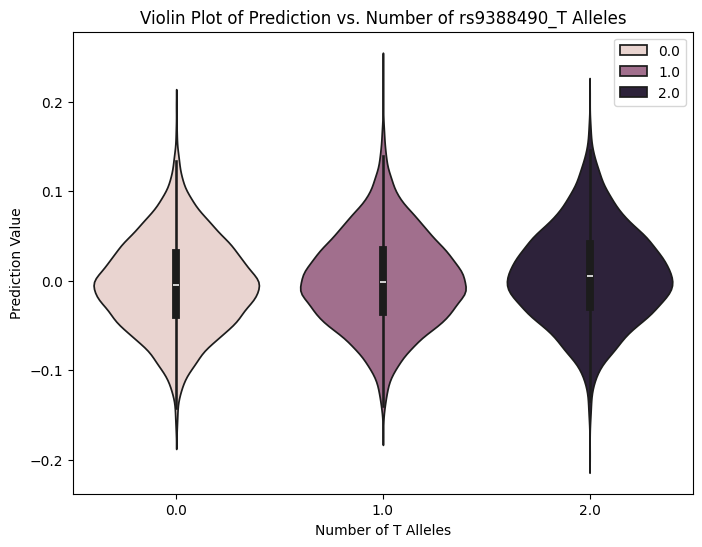

rs3001020_T
R-squared (uncentered): 0.0019427352822051214
Prob (F-statistic): 0.3210997371214266 



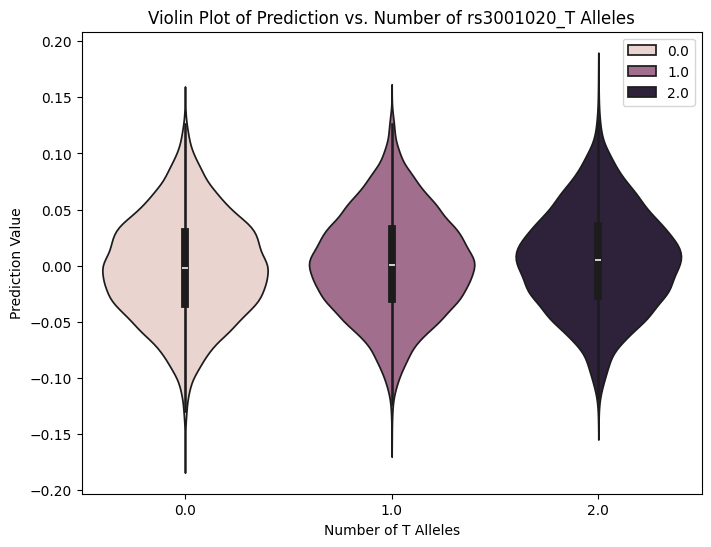

rs798518_G
R-squared (uncentered): 0.0024062229479477892
Prob (F-statistic): 0.06698422450221772 



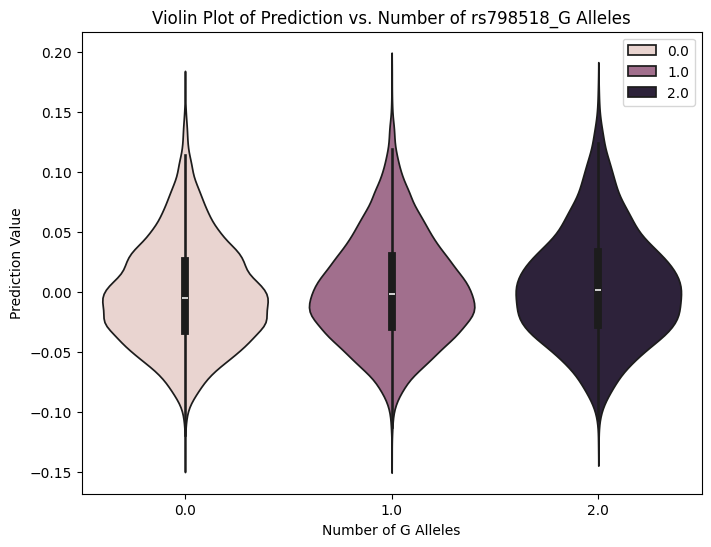

rs2214230_T
R-squared (uncentered): 0.0027256253716820833
Prob (F-statistic): 0.016273482092033716 



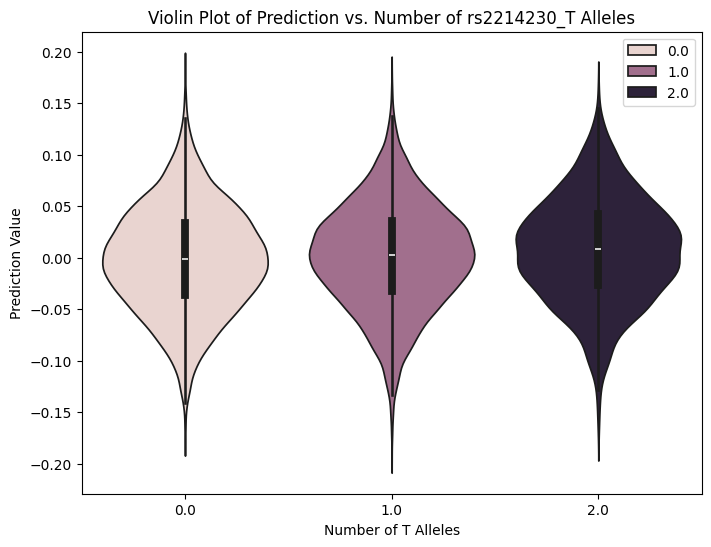

rs4556147_T
R-squared (uncentered): 0.0025406776923048158
Prob (F-statistic): 0.038038449963533644 



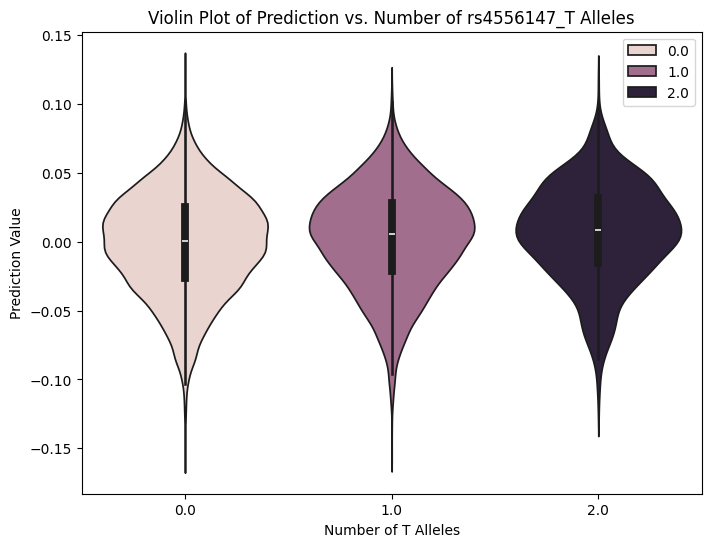

rs6478240_G
R-squared (uncentered): 0.0028691279241516154
Prob (F-statistic): 0.007996914352106277 



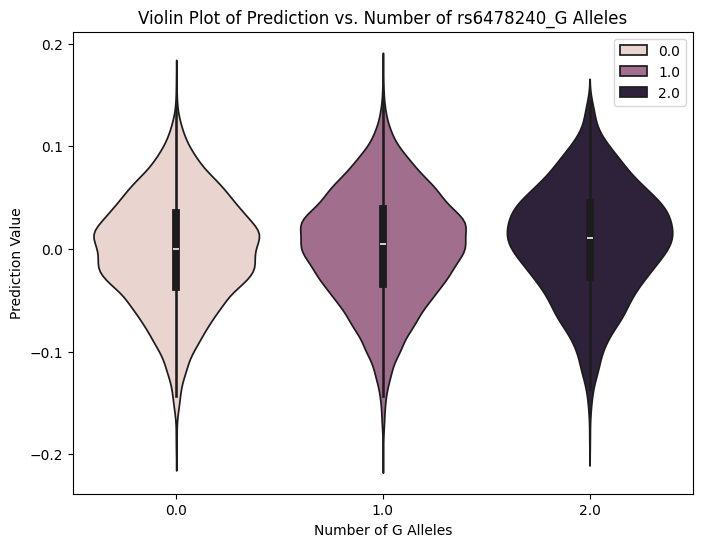

rs9695700_A
R-squared (uncentered): 0.000852635294985471
Prob (F-statistic): 0.9981449640816838 



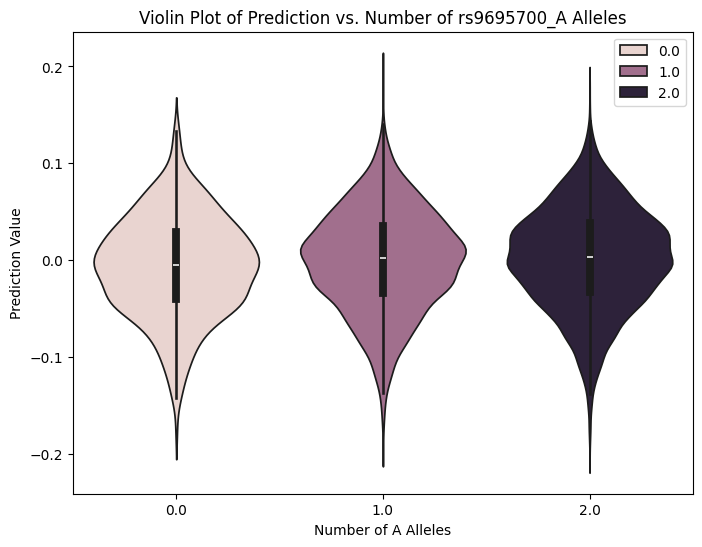

rs11049390_A
R-squared (uncentered): 0.002720262332555734
Prob (F-statistic): 0.016697240314962582 



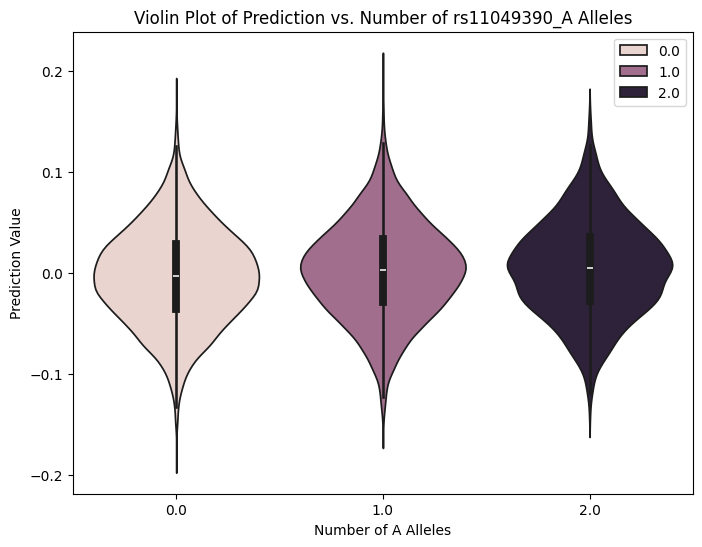

rs79487293_T
R-squared (uncentered): 0.004672755694254405
Prob (F-statistic): 7.08409011895008e-08 



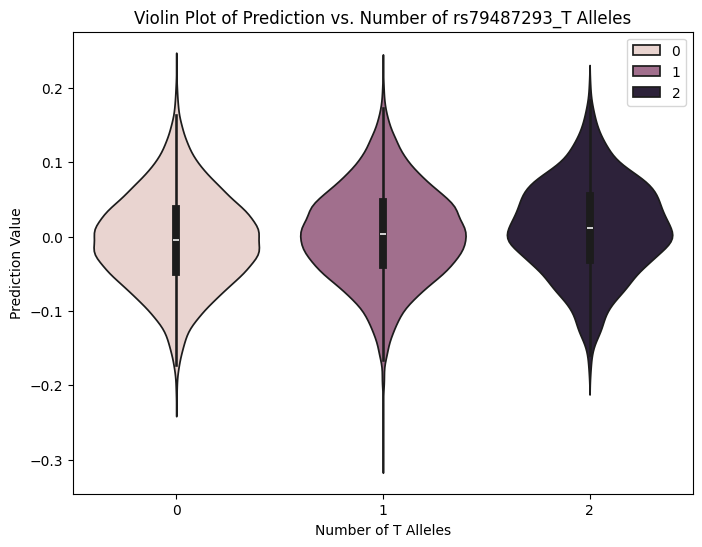

rs12146713_C
R-squared (uncentered): 0.005022975403809471
Prob (F-statistic): 4.938540889702937e-09 



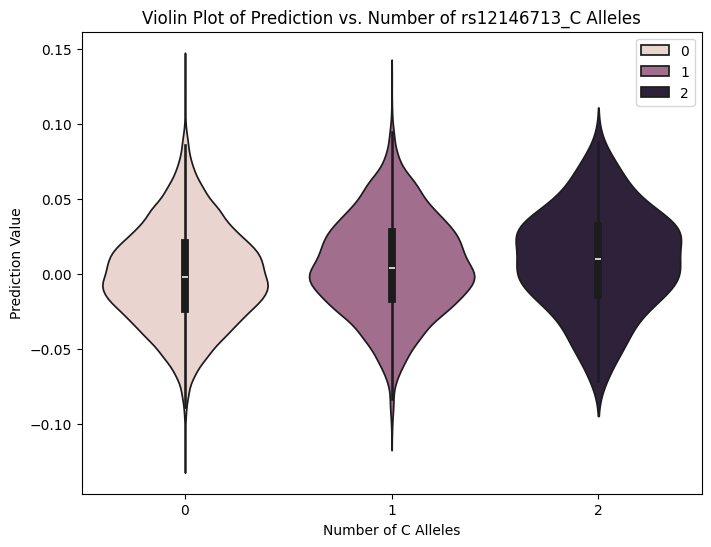

rs4924346_A
R-squared (uncentered): 0.004847219122801616
Prob (F-statistic): 1.902580122798209e-08 



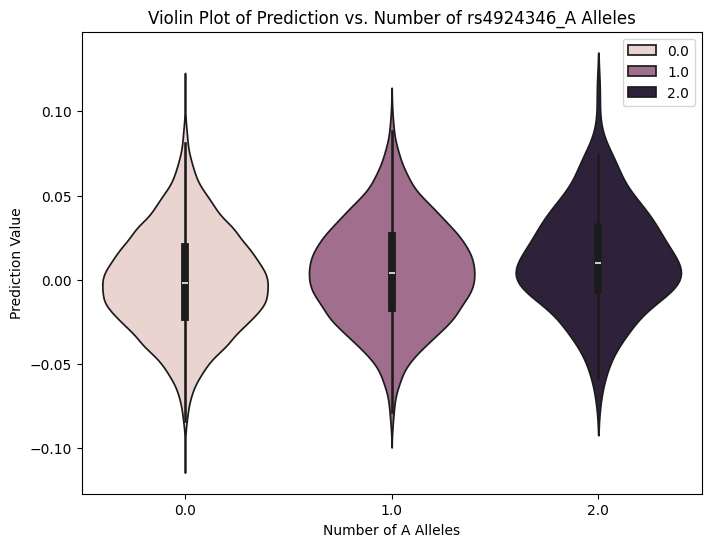

rs4843552_A
R-squared (uncentered): 0.00262133480611082
Prob (F-statistic): 0.026522079171013298 



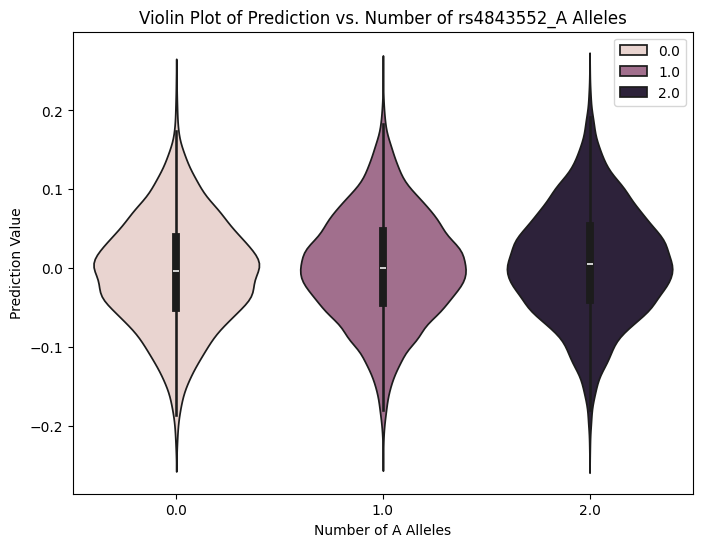

rs3874943_G
R-squared (uncentered): 0.0024379698827320384
Prob (F-statistic): 0.058848474538167696 



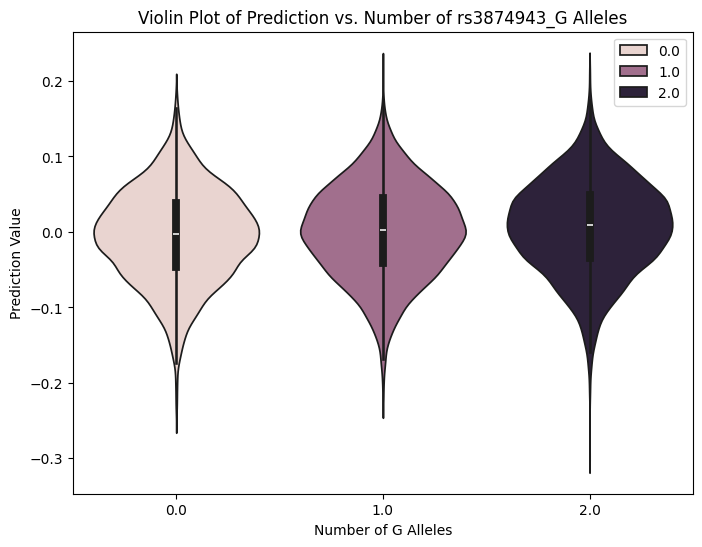

In [95]:
for key in bdd_geno.keys():
    if key.startswith('rs'):
        y = bdd_geno[key]         # Genotype values (0, 1, or 2)

        mod = sm.OLS(y, X)
        res = mod.fit()
        #print(res.summary())
        print(key)
        print("R-squared (uncentered):", res.rsquared)
        print("Prob (F-statistic):", res.f_pvalue, "\n")
        merged = pd.DataFrame({"IID":bdd_geno.IID, key:y,"prediction":res.predict()}).sort_values('prediction')
        
        
        plt.figure(figsize=(8, 6))
        sns.violinplot(x=key, y='prediction', data=merged, hue=key)

        plt.xlabel(f'Number of {key[-1]} Alleles')
        plt.ylabel('Prediction Value')
        plt.title(f'Violin Plot of Prediction vs. Number of {key} Alleles')
        plt.legend(loc='upper right')
        plt.show()



In [98]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            rs3874943_G   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              1.367
Date:                Fri, 20 Dec 2024   Prob (F-statistic):                      0.0588
Time:                        11:16:51   Log-Likelihood:                         -37744.
No. Observations:               22981   AIC:                                  7.557e+04
Df Residuals:                   22940   BIC:                                  7.590e+04
Df Model:                          41                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
dim1          -0.0057      0.008     -0.688      0.492      -0.022       0.010
dim2           0.0253      0.008      3.042      0.002       0.009       0.042
dim3           0.0130      0.008      1.573      0.116      -0.003       0.029
dim4           0.0006      0.008      0.070      0.944      -0.016       0.017
dim5           0.0059      0.008      0.713      0.476      -0.010       0.022
dim6          -0.0041      0.008     -0.494      0.621      -0.020       0.012
dim7          -0.0065      0.008     -0.790      0.429      -0.023       0.010
dim8          -0.0100      0.008     -1.204      0.228      -0.026       0.006
dim9           0.0042      0.008      0.503      0.615      -0.012       0.020
dim10          0.0048      0.008      0.589      0.556      -0.011       0.021
dim11         -0.0042      0.008     -0.509      0.611      -0.020       0.012
dim12         -0.0159      0.008     -1.928      0.054      -0.032       0.000
dim13          0.0221      0.008      2.695      0.007       0.006       0.038
dim14          0.0027      0.008      0.324      0.746      -0.013       0.019
dim15         -0.0053      0.008     -0.639      0.523      -0.021       0.011
dim16         -0.0114      0.008     -1.377      0.169      -0.028       0.005
dim17          0.0035      0.008      0.427      0.670      -0.013       0.020
dim18         -0.0095      0.008     -1.155      0.248      -0.026       0.007
dim19          0.0051      0.008      0.615      0.538      -0.011       0.021
dim20         -0.0060      0.008     -0.722      0.471      -0.022       0.010
dim21         -0.0064      0.008     -0.774      0.439      -0.023       0.010
dim22          0.0009      0.008      0.113      0.910      -0.015       0.017
dim23         -0.0057      0.008     -0.692      0.489      -0.022       0.011
dim24          0.0060      0.008      0.724      0.469      -0.010       0.022
dim25          0.0095      0.008      1.157      0.247      -0.007       0.026
dim26          0.0050      0.008      0.605      0.545      -0.011       0.021
dim27          0.0158      0.008      1.916      0.055      -0.000       0.032
dim28         -0.0027      0.008     -0.325      0.745      -0.019       0.014
dim29          0.0089      0.008      1.077      0.282      -0.007       0.025
dim30          0.0056      0.008      0.672      0.501      -0.011       0.022
dim31         -0.0048      0.008     -0.581      0.562      -0.021       0.011
dim32         -0.0093      0.008     -1.124      0.261      -0.025       0.007
dim33         -0.0041      0.008     -0.498      0.618      -0.020       0.012
dim34          0.0113      0.008      1.373      0.170      -0.005       0.027
dim35         -0.0095      0.008     -1.149      0.251      -